In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras import models, layers, callbacks
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

In [2]:
# class myCallback(callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy') > 0.96):
#             print("\nAccuracy is greater than 96% so terminating training!")
#             self.model.stop_training = True
#         elif (logs.get('loss') < 0.3):
#             print("\nLoss is less than 0.3 so terminating training!")
#             self.model.stop_training = True

            
# callbacks = myCallback()

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("dataset/train",shuffle=True,image_size=(256,256),batch_size=32)

Found 4704 files belonging to 4 classes.


In [3]:
testing = tf.keras.preprocessing.image_dataset_from_directory("dataset/test",shuffle=True,image_size=(256,256),batch_size=32)

Found 1228 files belonging to 4 classes.


In [4]:
disease = dataset.class_names
disease

['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']

In [5]:
for img,lab in dataset.take(1):
    print(img.shape)
    print(lab.numpy())

(32, 256, 256, 3)
[0 2 2 1 3 0 1 3 1 1 0 2 2 0 1 0 1 1 2 3 3 3 1 2 0 1 3 3 3 2 1 1]


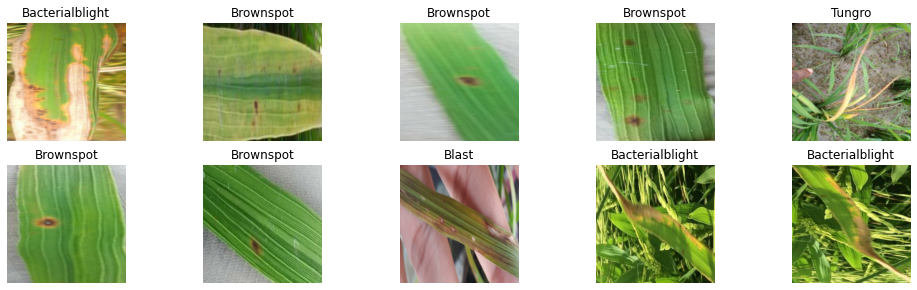

In [6]:
plt.figure(figsize=(17,10))
for img,lab in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(4,5,i+1),
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(disease[lab[i]])
        plt.axis('off')

In [7]:
len(testing)//2

19

In [8]:
valid = testing.take(8)

In [9]:
test = testing.skip(8)

In [10]:
len(valid), len(test), len(dataset)

(8, 31, 147)

In [11]:
dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [12]:
scale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [14]:
model = models.Sequential([
    scale,
    data_augmentation,
    # Add CNNs and maxpooling layers (trail & error work)
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.build(input_shape=(32,256,256,3))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    dataset,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=valid
)

Epoch 1/50
147/147 [==============================] - 26s 141ms/step - loss: 1.1544 - accuracy: 0.4664 - val_loss: 0.9100 - val_accuracy: 0.6484
Epoch 2/50
147/147 [==============================] - 20s 135ms/step - loss: 0.8907 - accuracy: 0.6422 - val_loss: 0.8028 - val_accuracy: 0.6406
Epoch 3/50
147/147 [==============================] - 21s 139ms/step - loss: 0.6625 - accuracy: 0.7277 - val_loss: 0.4522 - val_accuracy: 0.8398
Epoch 4/50
147/147 [==============================] - 23s 153ms/step - loss: 0.4981 - accuracy: 0.8065 - val_loss: 0.3580 - val_accuracy: 0.8711
Epoch 5/50
147/147 [==============================] - 20s 137ms/step - loss: 0.3712 - accuracy: 0.8565 - val_loss: 0.2836 - val_accuracy: 0.8867
Epoch 6/50
147/147 [==============================] - 20s 137ms/step - loss: 0.2954 - accuracy: 0.8856 - val_loss: 0.2284 - val_accuracy: 0.9219
Epoch 7/50
147/147 [==============================] - 20s 138ms/step - loss: 0.1943 - accuracy: 0.9262 - val_loss: 0.1670 - val_ac

In [18]:
score = model.evaluate(test)

31/31 [==============================] - 2s 56ms/step - loss: 1.1265e-04 - accuracy: 1.0000


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

In [21]:
len(acc), len(val_acc)

(50, 50)

Text(0.5, 1.0, 'Training & Validation Accuracy')

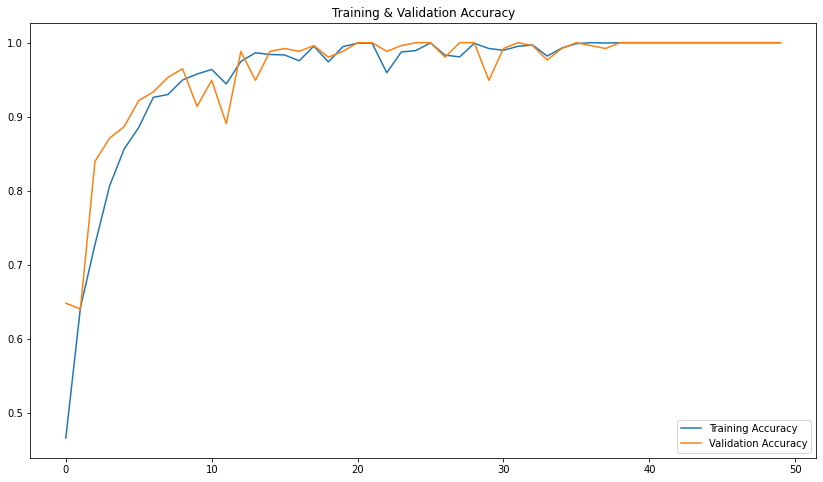

In [22]:
plt.figure(figsize=(31,8))
plt.subplot(1,2,1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title('Training & Validation Accuracy')

Text(0.5, 1.0, 'Training & Validation Loss')

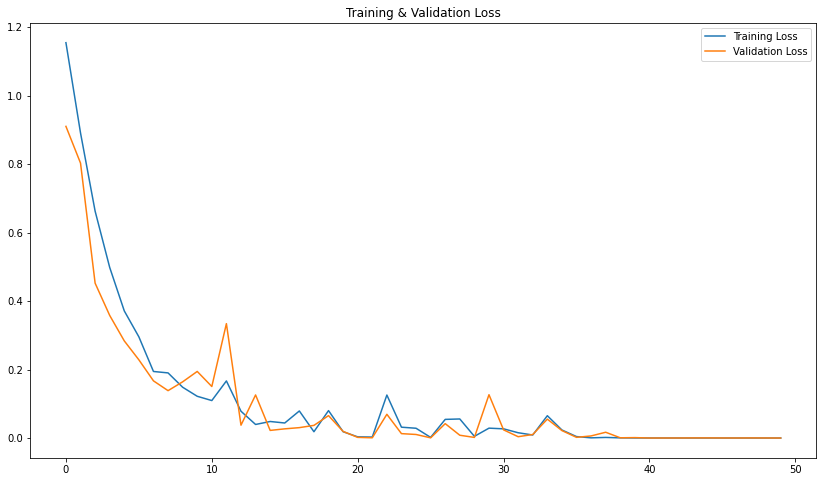

In [23]:
plt.figure(figsize=(31,8))
plt.subplot(1,2,1)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc="upper right")
plt.title('Training & Validation Loss')

In [24]:
batch1 =test.take(1)


True : Tungro
Predicted : Tungro


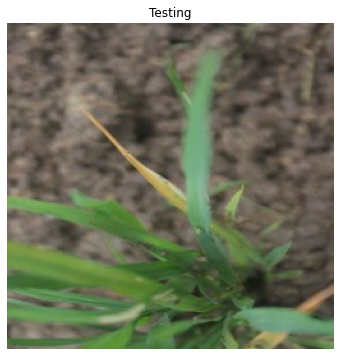

In [25]:
plt.figure(figsize=(6,6))
for img, clf in batch1:
    random_img = img[0].numpy().astype('uint8')
    typ = clf[0].numpy()
    plt.imshow(random_img)
    plt.axis('off')
    plt.title("Testing")
    prediction = model.predict(img)
    print("\nTrue :",disease[typ])
    print("Predicted :",disease[np.argmax(prediction[0])])

In [26]:
def pred(img):
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = tf.expand_dims(array,0)
    prediction = model.predict(array)
    clf = disease[np.argmax(prediction[0])]
    conf = round(100 * (np.max(prediction[0])), 2)
    return clf, conf

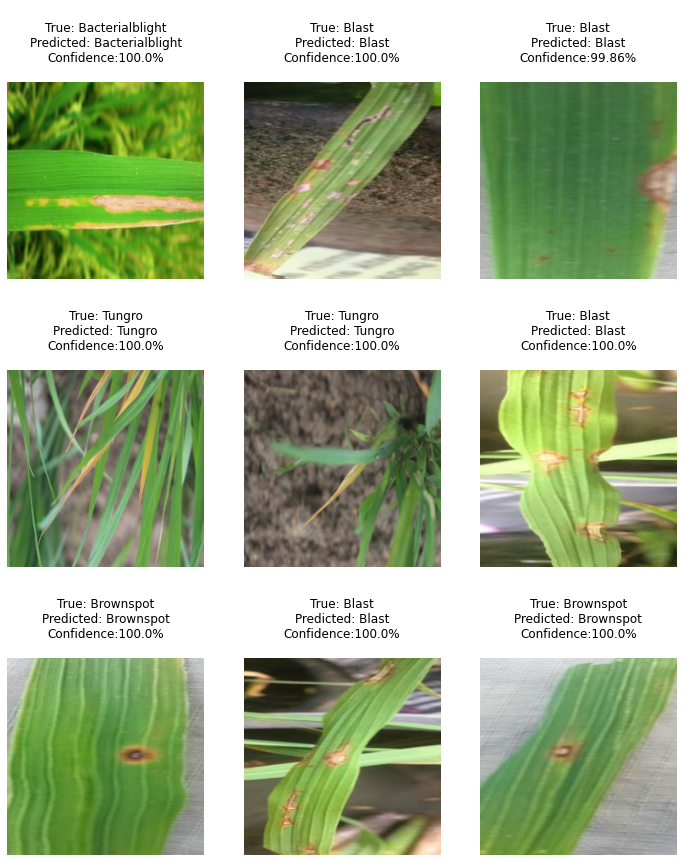

In [27]:
plt.figure(figsize=(12,15))
for img, lab in batch1:
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        prediction, confidence = pred(img[i].numpy())
        true = disease[lab[i]]
        plt.title(f"\nTrue: {true}\nPredicted: {prediction}\nConfidence:{confidence}%\n")
        plt.axis('off')